# Sprint 1

# Import the Required Libraries

In [1]:
from keras.utils import np_utils #used for one-hot encoding
from tensorflow.keras.datasets import mnist #mnist dataset

# Loading the Data

In [2]:
#splitting the mnist data into train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#shape is used to give the dimension values
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing the Data

In [4]:
#printing the first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#printing label of first image
y_train[0]

5

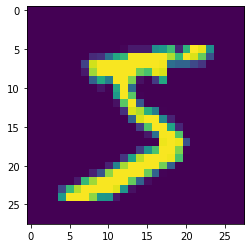

In [6]:
#used for data visualization
import matplotlib.pyplot as plt
#plotting the index=0 image
plt.imshow(X_train[0])

# Reshaping Dataset 

In [7]:
#Reshaping to format which CNN expects(batch, height, width, channels)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

# Applying One Hot Encoding

In [8]:
#storing the number of classes in a variable
number_of_classes = 10
#converts the output into binary format(0's and 1's)
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
#printing the label after conversion
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Sprint 2

# Add CNN Layers

In [10]:
#it is a plain stack of layers
from tensorflow.keras.models import Sequential

#A layer consists of a tensor-in tensor-out computation function
from tensorflow.keras import layers

#Dense-Dense Layer is the regular deeply connected neural network
#Flatten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Dense, Flatten

#Convolutional Layer
from tensorflow.keras.layers import Conv2D

#optimizer
from keras.optimizers import Adam

In [11]:
#creating the model
model = Sequential()

#adding the model layers
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

#flatten the dimesions of the image
model.add(Flatten())

#output layer with 10 neurons
model.add(Dense(number_of_classes, activation="softmax"))

# Compiling the Model

In [12]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

# Train the Model

In [13]:
#fit the model
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2159 - accuracy: 0.9510 - val_loss: 0.0920 - val_accuracy: 0.9691
Epoch 2/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0677 - accuracy: 0.9790 - val_loss: 0.0752 - val_accuracy: 0.9791
Epoch 3/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0938 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0858 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 128s 69ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.1074 - val_accuracy: 0.9767


# Observing the metrics

In [14]:
#evaluation of the model
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1073894053697586, 0.9767000079154968]


# Test the Model

In [15]:
#slicing the first 4 images from x_test data and printing the predicted output
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 182ms/step
[[1.81283617e-11 1.30722115e-20 1.08789150e-12 1.97237537e-09
  4.51221689e-18 7.48173614e-18 7.57279411e-24 1.00000000e+00
  3.74366120e-12 5.46848114e-12]
 [2.99534919e-12 3.50109427e-13 1.00000000e+00 3.08778448e-13
  4.81963125e-21 1.97018259e-17 2.83632389e-08 1.38402293e-20
  1.59347955e-14 3.73923093e-19]
 [1.15215698e-10 9.99915361e-01 3.49038819e-05 4.76146249e-13
  2.60240910e-07 2.49884533e-06 9.83750326e-09 2.72383403e-07
  4.66862039e-05 2.54830120e-13]
 [1.00000000e+00 1.29683128e-19 2.12061424e-10 3.11844713e-18
  5.09320505e-14 8.62738547e-15 2.03085451e-10 1.22438519e-14
  3.37660007e-15 1.52262317e-12]]


In [16]:
import numpy as np

#printing our labels from first 4 images
print(np.argmax(prediction, axis=1))

#printing the actual labels
print(Y_test[:4])


[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
